# **TUGAS BESAR 2 - Analisis Deret Waktu**

**Kelompok 6**

Anggota:
- Dito Adistya Wirawan (1305220048)
- Nurfaidzi Ramdhani Arifin (1305220075)
- Luthfillah Akhtar Fakhrudin (1305220100)

# Importing

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, bartlett,levene
import matplotlib.pyplot as plt

import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data Transformation

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/adistyadito/TubesADW/refs/heads/main/ADW_BBRI.csv')

In [ ]:
df = df.iloc[2:]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.rename(columns={'Price':'Date'}, inplace = True)

<ipython-input-127-689c15a8463b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Price':'Date'}, inplace = True)


In [ ]:
df.drop(columns=['Adj Close', 'High', 'Low', 'Open'], inplace=True)

KeyError: "['Adj Close', 'High', 'Low', 'Open'] not found in axis"

In [ ]:
df.isna().sum()

,0
Date,0
Close,0
Volume,0


In [ ]:
df.dtypes

,0
Date,object
Close,object
Volume,object


In [ ]:
df['Close'] = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-131-4a15046eb686>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = df['Close'].astype(float)
<ipython-input-131-4a15046eb686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)
<ipython-input-131-4a15046eb686>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
df

,Date,Close,Volume
0,2020-01-02 00:00:00+00:00,4009.021729,45886302.0
1,2020-01-03 00:00:00+00:00,4018.112305,91189705.0
2,2020-01-06 00:00:00+00:00,3972.658691,48648450.0
3,2020-01-07 00:00:00+00:00,3999.930908,114344885.0
4,2020-01-08 00:00:00+00:00,3981.749512,188929583.0
...,...,...,...
1205,2024-12-19 00:00:00+00:00,4090.000000,381986300.0
1206,2024-12-20 00:00:00+00:00,4060.000000,252689600.0
1207,2024-12-23 00:00:00+00:00,4210.000000,167689800.0
1208,2024-12-24 00:00:00+00:00,4200.000000,199536100.0


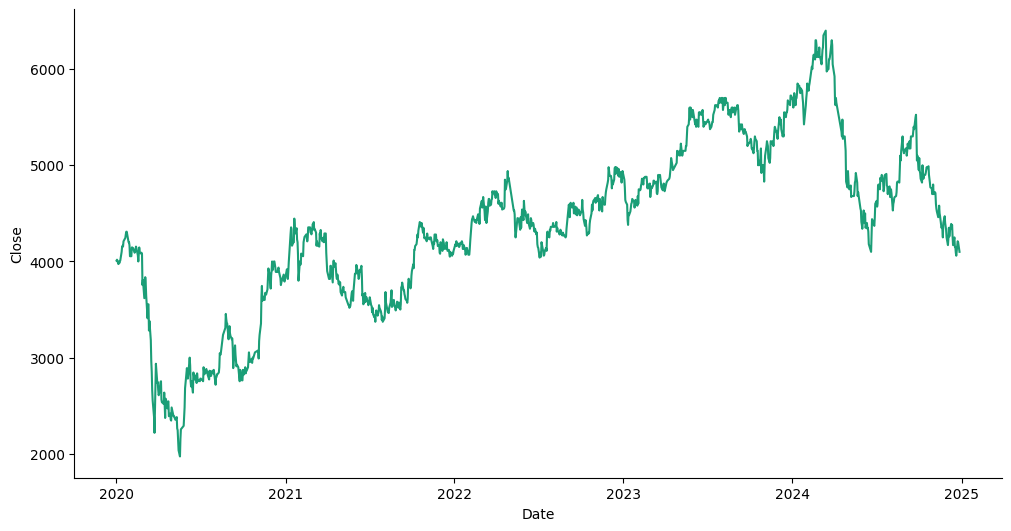

In [ ]:
# @title Date vs Close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

# Box-Cox

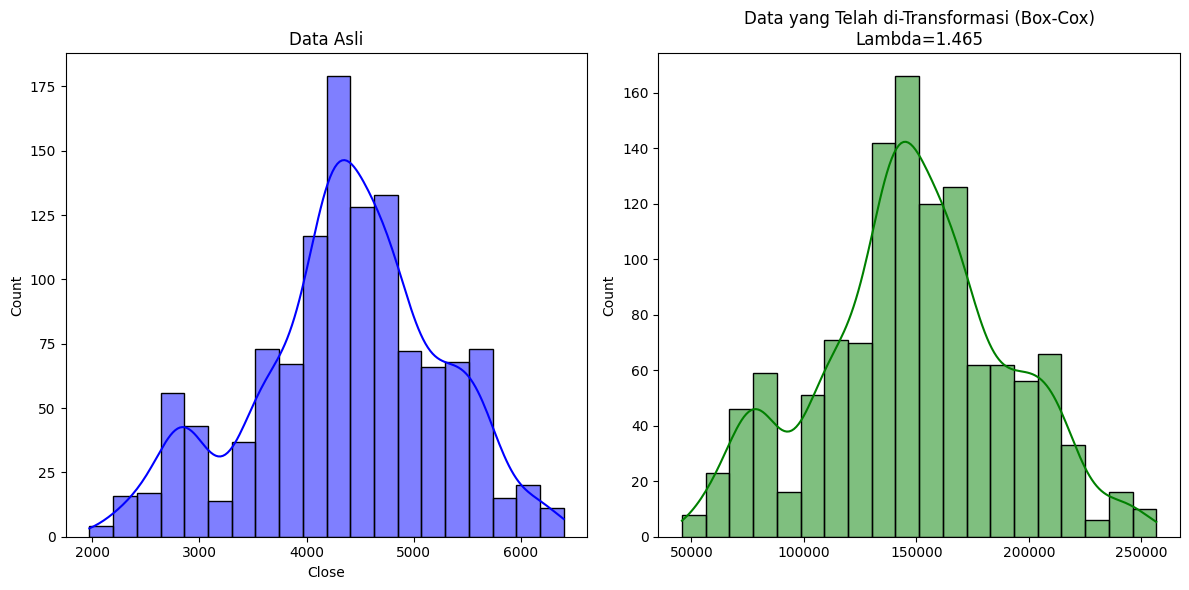

NameError: name 'levene' is not defined

In [25]:
data_transformed, nilai_lambda = boxcox(df['Close'])

# Plotting histogram untuk data asli dan data yang telah di-transformasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=20, kde=True, color='blue')
plt.title('Data Asli')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, bins=20, kde=True, color='green')
plt.title(f'Data yang Telah di-Transformasi (Box-Cox)\nLambda={nilai_lambda:.3f}')  # Menambahkan nilai lambda ke judul

plt.tight_layout()
plt.show()

# Lakukan uji Levene untuk homogenitas varians
statistik_uji_levene, nilai_p_uji_levene = levene(df['Close'], data_transformed)
print('Statistik Uji Levene:', statistik_uji_levene)
print('Nilai p:', nilai_p_uji_levene)

# Interpretasi uji Levene
if nilai_p_uji_levene < 0.05:
    print('Nilai p < 0.05: Data yang telah di-transformasi memiliki varians yang tidak sama.')
else:
    print('Nilai p >= 0.05: Data yang telah di-transformasi memiliki varians yang sama.')

print('Lambda value used for Transformation:', nilai_lambda)

# Uji ADF

In [ ]:
df_saham = df['Close']

result = adfuller(df_saham)

#Tampilkan  Hasil
print('ADF Statistic:',result[0])
print('p-value:',result[1])
print('Critical values:')
for key,value in result[4].items():
  print(f' {key}:{value}')

# Interpretasi hasil
if result[1] <= 0.05:
    print("Deret waktu stasioner (tolak hipotesis nol)")
else:
    print("Deret waktu tidak stasioner (gagal menolak hipotesis nol)")

ADF Statistic: -1.5417699355327747
p-value: 0.5127565456903806
Critical values:
 1%:-3.4357884107845953
 5%:-2.863941528023427
 10%:-2.56804861503762
Deret waktu tidak stasioner (gagal menolak hipotesis nol)


Karena data time series tidak stasioner, maka akan dilakukan differencing

## Differencing

In [ ]:
# Lakukan differencing
df['CloseD1'] = df['Close'].diff()

In [ ]:
df['CloseD1']

,CloseD1
0,NaN
1,9.090576
2,-45.453613
3,27.272217
4,-18.181396
...,...
1205,-60.000000
1206,-30.000000
1207,150.000000
1208,-10.000000


In [ ]:
# Hapus nilai NaN yang dihasilkan dari differencing
df = df.dropna()

## Uji ulang kestasioneran data

In [ ]:
df_saham = df['CloseD1']

result = adfuller(df_saham)

#Tampilkan  Hasil
print('ADF Statistic:',result[0])
print('p-value:',result[1])
print('Critical values:')
for key,value in result[4].items():
  print(f' {key}:{value}')

# Interpretasi hasil
if result[1] <= 0.05:
    print("Deret waktu stasioner (tolak hipotesis nol)")
else:
    print("Deret waktu tidak stasioner (gagal menolak hipotesis nol)")

ADF Statistic: -17.952982866154983
p-value: 2.8343118795788065e-30
Critical values:
 1%:-3.4357884107845953
 5%:-2.863941528023427
 10%:-2.56804861503762
Deret waktu stasioner (tolak hipotesis nol)


Test

In [24]:
# Mengubah data_transformed menjadi pandas Series
data_transformed_series = pd.Series(data_transformed)

# Differencing pada data yang telah di-transformasi
data_transformed_diff = data_transformed_series.diff().dropna()

# Uji ADF (Augmented Dickey-Fuller) pada data yang telah di-differencing
result_diff = adfuller(data_transformed_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

# Interpretasi hasil uji ADF differencing
if result_diff[1] < 0.05:
    print('P-Value < 0.05: Data yang telah di-differencing bersifat stasioner')
else:
    print('P-Value >= 0.05: Data yang telah di-differencing bersifat tidak stasioner')

NameError: name 'data_transformed' is not defined

# Plot ACF dan PACF

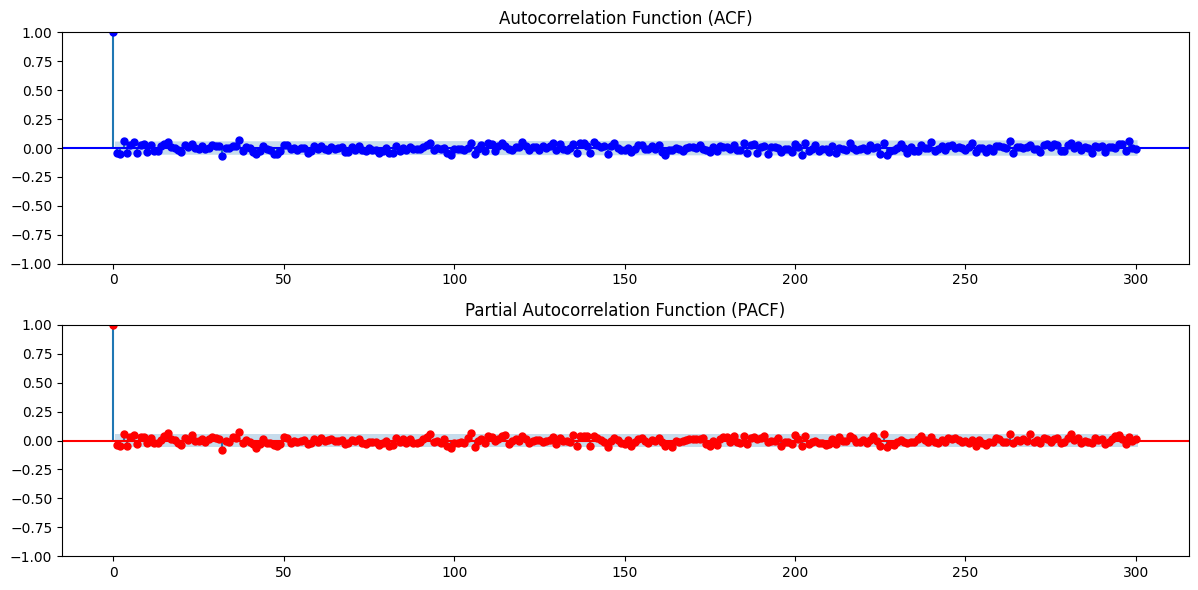

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF dan PACF
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(2, 1, 1)
plot_acf(df_saham, lags=300, ax=plt.gca(), color='blue')
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(2, 1, 2)
plot_pacf(df_saham, lags=300, ax=plt.gca(), color='red')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [23]:
from statsmodels.tsa.stattools import acf, pacf

# Menghitung ACF dan PACF
acf_vals = acf(df, nlags=20)
pacf_vals = pacf(df_saham, nlags=20)

# Menentukan batas cut-off
batas_cut_off = 1.96 / len(df_saham) ** 0.5

# Identifikasi lag-lag yang melampaui batas cut-off pada ACF
cutoff_acf = [lag for lag in range(len(acf_vals)) if abs(acf_vals[lag]) > batas_cut_off]

# Identifikasi lag-lag yang melampaui batas cut-off pada PACF
cutoff_pacf = [lag for lag in range(len(pacf_vals)) if abs(pacf_vals[lag]) > batas_cut_off]

# Tampilkan hasil identifikasi
print('Lags yang melampaui batas cut-off pada ACF:', cutoff_acf)
print('Lags yang melampaui batas cut-off pada PACF:', cutoff_pacf)


TypeError: float() argument must be a string or a real number, not 'Timestamp'